**Big data analitics**

**Assesment project**

Online retails database.
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The aim of this project is to analyze, visualize and study our retail dataset previously mentioned which has been imported from *https://archive.ics.uci.edu/dataset/352/online+retail*.

This dataset was chosen because Machine Learning has had a masive impact in the online retail world. So I wanted my project to be orientated to analyzing a retail dataset in order to analize how Machine Learning can benefit companies to understand patterns among their customers.

**Dataset:** Online Retail
https://archive.ics.uci.edu/dataset/352/online+retail

Features: 8

Instances:541909


Donated: on 2015

Downloaded: 04/10/2023

**Overview**

The Dataset used contains information about online sells from UK-retailers. The aim is to build a productive model to predict what is the nationality of potential customers. In order for companies to know what is their strongest markets.

Peer-reviewed Paper: *https://www.sciencedirect.com/science/article/pii/S0022435920300932#abs0010*

Data exploration

Firstly we will Import our required libraries and import our database in CSV format using pandas.

In [158]:
# import required variables
import pandas as pd
import numpy as np

In [159]:
#Import data
df = pd.read_csv('Online Retail.csv')
df.head(10) #or simply df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2010 08:34,1.69,13047.0,United Kingdom


Now that we can confirm that our database works we will do some exploration on it.

**Size or shape of our dataset:**

In [160]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 541909 rows and 8 columns


Our dataset has 541909 records or instances and 8 features.

**Understanding the dataset.**

Out of all the features found within our dataset the main relationship we really care for our machine learning project is the relationship between Invoice Numbers and countries. This one provides the number of sales per country.

We will use seaborn python library for displaying a graph with this relationship. However since our dataset file has 541909 records, I will use a sample of 1000 records instead for the program to run quicker. this sample will be use for training my machine learning algorithm. 

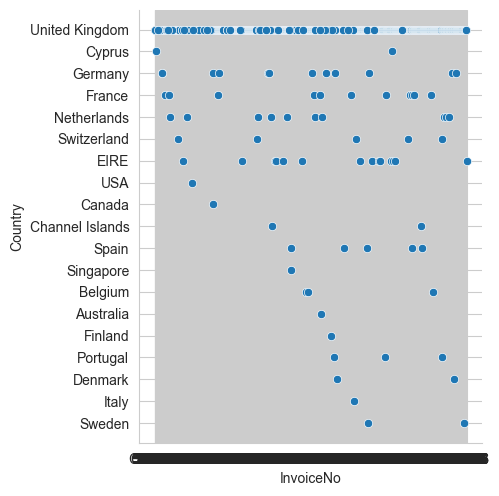

In [161]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(df.sample(1000), x_vars=['InvoiceNo'], y_vars='Country', height=5)

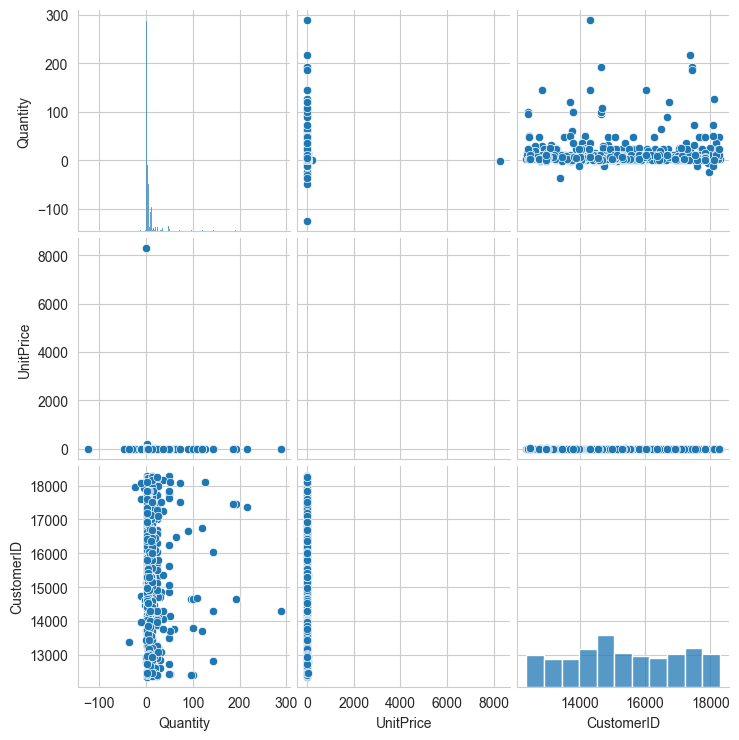

In [162]:
sns.pairplot(df.sample(1000))